In [1]:
# model to predict user will click the ad or not based on his experience and estimated salary for a given data

In [2]:
# import libraries
import os
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# feature scaling
from sklearn.preprocessing import StandardScaler
# for handling categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
# for logistic regression model
from sklearn.ensemble import RandomForestClassifier

# import function python file
import importlib.util

from sklearn.metrics import confusion_matrix

In [3]:
# importing template file 
spec = importlib.util.spec_from_file_location("function", "/home/admin1/PycharmProjects/Machine-Learning-Followship-Program/week10/Utility/common_function.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
object_common_function = foo.function()


In [4]:
# Import dataset

dataset = object_common_function.load_data("Social_Network_Ads .csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# drop unwanted col

dataset.drop(columns=['User ID','Gender'], inplace = True)

In [6]:
# information of dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
# description of dataset 

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [8]:
# check for null

dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
# check for duplicates
dataset.duplicated().sum()

33

In [10]:
dataset.min()

Age                   18
EstimatedSalary    15000
Purchased              0
dtype: int64

In [11]:
dataset.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [12]:
# # handle categorical data
# def handle_categorical_data(x_data):
#     #encode categorical data
    
#     label_encod = LabelEncoder()
#     x_data[:, 1] = label_encod.fit_transform(x_data[:, 1])
    
# #     # one hot encoding
# #     onehotencode = OneHotEncoder(categorical_features= [1])
# #     x_data = onehotencode.fit_transform(x_data).toarray()
    
#     return x_data
    
# x_data = handle_categorical_data(x_data)

In [13]:
# os.mkdir("CSV_files")

In [14]:
# call function split data set

object_common_function.splitdata(dataset,0.30,0.20,"CSV_files")

train :  (280, 3)  test :  (120, 3)
train_data :  (224, 3)  crossV_data :  (56, 3)


In [15]:
# load train dataset

train_data = object_common_function.load_data("CSV_files/train_file.csv")
print("train_data has {} rows and {} Columns".format(train_data.shape[0],train_data.shape[1]))

train_data has 224 rows and 3 Columns


In [16]:
# check information 

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 3 columns):
Age                224 non-null int64
EstimatedSalary    224 non-null int64
Purchased          224 non-null int64
dtypes: int64(3)
memory usage: 5.3 KB


In [17]:
train_data.head()

,Age,EstimatedSalary,Purchased
0,51,146000,1
1,19,25000,0
2,32,18000,0
3,35,79000,0
4,39,134000,1


In [18]:
# split dataset in feature and label

x_train = train_data.iloc[:,[0,1]].values
y_train = train_data.iloc[:,2].values

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



 confusion_matrix
 [[137   1]
 [  2  84]]


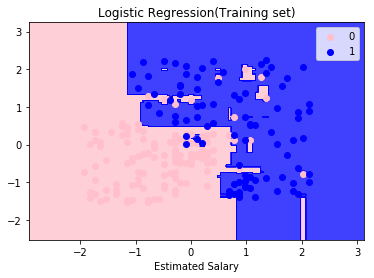

Accuracy: accuracy_score : 98.66071428571429
Accuracy: average_precision_score : 97.41816494039476
Accuracy:  balanced_accuracy_score : 98.47489046174587
Accuracy:  hamming_loss : 0.013392857142857142
Accuracy:  fbeta_score : 98.66071428571429
pickel file create


In [20]:
class Random_Forest_Classification:
    
    # feature scaling
    
    def feature_scale(self,x_train):
        sc_x = StandardScaler()
        x_train = sc_x.fit_transform(x_train)
        return x_train
    
    # fit logistic regression model
    
    def fit_model(self,x_train,y_train):
        
        classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
        classifier.fit(x_train,y_train)
        return classifier
    
    # confusion matrix
    
    def confusion_matrix(self,y_train,y_predict): 
        cm = confusion_matrix(y_train,y_predict)
        return cm
    
    
    
def main(x_train,y_train):
    
    # object
    object_LR = Random_Forest_Classification()
    
    # call function
    x_train_data = object_LR.feature_scale(x_train)
        
    classifier = object_LR.fit_model(x_train_data,y_train)
    
    y_predict = object_common_function.prediction(x_train_data,classifier)
    
    
    confusion_mat = object_LR.confusion_matrix(y_train,y_predict)
    print("\n confusion_matrix\n",confusion_mat )
    
    object_common_function.visualisation(x_train_data,y_train,classifier)
    
    accuracy,accuracy1,accuracy2,accuracy3,acc = object_common_function.Accuracy(y_train,y_predict)
    
    
    object_common_function.pickel_file(classifier,'trainmodel.pkl')
    print("pickel file create")

if __name__ == '__main__':
    main(x_train,y_train)